<a href="https://colab.research.google.com/github/PieroB29/Clases_Python/blob/main/Modelos_de_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving housing_test.csv to housing_test.csv
Saving housing_train.csv to housing_train.csv


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [ ]:
df_train = pd.read_csv('housing_train.csv')
df_test = pd.read_csv('housing_test.csv')
df_train

,tasa_crimen,lz,industrial,rio,nox,cuartos,edad,distancia,autopistas,impuestos,profesores,status,valor
0,0.01096,55.0,2.25,0,0.389,6.453,31.9,7.3073,1,300,15.3,8.23,22.0
1,0.54050,20.0,3.97,0,0.575,7.470,52.6,2.8720,5,264,13.0,3.16,43.5
2,0.21409,22.0,5.86,0,0.431,6.438,8.9,7.3967,7,330,19.1,3.59,24.8
3,0.31827,0.0,9.90,0,0.544,5.914,83.2,3.9986,4,304,18.4,18.33,17.8
4,0.02055,85.0,0.74,0,0.410,6.383,35.7,9.1876,2,313,17.3,5.77,24.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,0.07896,0.0,12.83,0,0.437,6.273,6.0,4.2515,5,398,18.7,6.78,24.1
401,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,15.71,21.7
402,0.25199,0.0,10.59,0,0.489,5.783,72.7,4.3549,4,277,18.6,18.06,22.5
403,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,9.42,27.5


## Modelo de regresión Lineal Univariable

In [ ]:
linear_univ_mod = LinearRegression().fit(df_train[['status']], df_train[['valor']])

In [ ]:
print("El intercepto de la regresión es {}. La pendiente de la regresión es {}.".format(round(linear_univ_mod.intercept_[0], 1), round(linear_univ_mod.coef_[0][0], 1)))

El intercepto de la regresión es 35.1. La pendiente de la regresión es -1.0.


In [ ]:
df_test[['predicted_linear_univ']] = pd.DataFrame(linear_univ_mod.predict(df_test[['status']]))

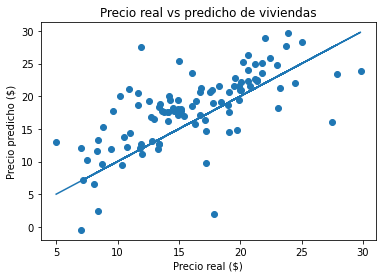

In [ ]:
plt.scatter(df_test[['valor']], df_test[['predicted_linear_univ']])
plt.plot(df_test[['valor']], df_test[['valor']])
plt.title("Precio real vs predicho de viviendas")
plt.xlabel("Precio real ($)")
plt.ylabel("Precio predicho ($)")
plt.show()

In [ ]:
RMSE = mean_squared_error(df_test[['valor']], df_test[['predicted_linear_univ']], squared=False)
MAE = mean_absolute_error(df_test[['valor']], df_test[['predicted_linear_univ']])
MAPE = mean_absolute_percentage_error(df_test[['valor']], df_test[['predicted_linear_univ']])
print("RMSE = {}".format(round(RMSE, 2)))
print("MAE = {}".format(round(MAE, 2)))
print("MAPE = {}".format(round(MAPE, 2)))

RMSE = 4.82
MAE = 3.75
MAPE = 0.28


## Modelo de regresión Lineal Univariable con Término Cuadrático

In [ ]:
df_train[['status_sq']] = df_train[['status']]*df_train[['status']]
linear_univ_mod_quad = LinearRegression().fit(df_train[['status', 'status_sq']], df_train[['valor']])

In [ ]:
df_test[['status_sq']] = df_test[['status']]*df_test[['status']]
df_test[['predicted_linear_univ_sq']] = pd.DataFrame(linear_univ_mod_quad.predict(df_test[['status', 'status_sq']]))

In [ ]:
RMSE = mean_squared_error(df_test[['valor']], df_test[['predicted_linear_univ_sq']], squared=False)
MAE = mean_absolute_error(df_test[['valor']], df_test[['predicted_linear_univ_sq']])
MAPE = mean_absolute_percentage_error(df_test[['valor']], df_test[['predicted_linear_univ_sq']])
print("RMSE = {}".format(round(RMSE, 2)))
print("MAE = {}".format(round(MAE, 2)))
print("MAPE = {}".format(round(MAPE, 2)))

RMSE = 4.25
MAE = 3.1
MAPE = 0.24


##Modelo de regresión Lineal Multivariable 

In [ ]:
columnas = ['tasa_crimen', 'lz', 'industrial', 'rio', 'nox', 'cuartos', 'edad', 'distancia', 'autopistas', 'impuestos', 'profesores', 'status']

In [ ]:
linear_multi_mod = LinearRegression().fit(df_train[columnas], df_train[['valor']])

In [ ]:
df_test[['predicted_linear_multi']] = pd.DataFrame(linear_multi_mod.predict(df_test[columnas]))

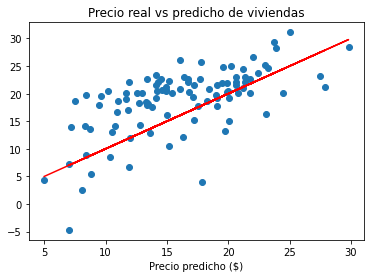

In [ ]:
plt.scatter(df_test[['valor']], df_test[['predicted_linear_multi']])
plt.plot(df_test[['valor']], df_test[['valor']], color = 'red')
plt.title("Precio real vs predicho de viviendas")
plt.xlabel("Precio real ($)")
plt.xlabel("Precio predicho ($)")
plt.show()

In [ ]:
RMSE = mean_squared_error(df_test[['valor']], df_test[['predicted_linear_multi']], squared=False)
MAE = mean_absolute_error(df_test[['valor']], df_test[['predicted_linear_multi']])
MAPE = mean_absolute_percentage_error(df_test[['valor']], df_test[['predicted_linear_multi']])
print("RMSE = {}".format(round(RMSE, 2)))
print("MAE = {}".format(round(MAE, 2)))
print("MAPE = {}".format(round(MAPE, 2)))

RMSE = 5.54
MAE = 4.58
MAPE = 0.35


##Modelo de regresión Lineal Multivariable con término cuadrático

In [ ]:
columnas_sq = ['tasa_crimen', 'lz', 'industrial', 'rio', 'nox', 'cuartos', 'edad', 'distancia', 'autopistas', 'impuestos', 'profesores', 'status', 'status_sq']

In [ ]:
linear_multi_mod_sq = LinearRegression().fit(df_train[columnas_sq], df_train[['valor']])

In [ ]:
df_test[['predicted_linear_multi_sq']] = pd.DataFrame(linear_multi_mod_sq.predict(df_test[columnas_sq]))

In [ ]:
RMSE = mean_squared_error(df_test[['valor']], df_test[['predicted_linear_multi_sq']], squared=False)
MAE = mean_absolute_error(df_test[['valor']], df_test[['predicted_linear_multi_sq']])
MAPE = mean_absolute_percentage_error(df_test[['valor']], df_test[['predicted_linear_multi_sq']])
print("RMSE = {}".format(round(RMSE, 2)))
print("MAE = {}".format(round(MAE, 2)))
print("MAPE = {}".format(round(MAPE, 2)))

RMSE = 4.4
MAE = 3.59
MAPE = 0.26


##Random forests

In [ ]:
mod_random_for = RandomForestRegressor().fit(df_train[columnas], df_train[['valor']].values.ravel())

In [ ]:
df_test[['predicted_random_for']] = pd.DataFrame(mod_random_for.predict(df_test[columnas]))

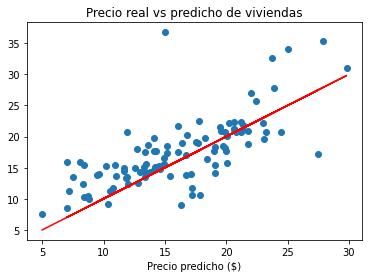

In [ ]:
plt.scatter(df_test[['valor']], df_test[['predicted_random_for']])
plt.plot(df_test[['valor']], df_test[['valor']], color = 'red')
plt.title("Precio real vs predicho de viviendas")
plt.xlabel("Precio real ($)")
plt.xlabel("Precio predicho ($)")
plt.show()

In [ ]:
RMSE = mean_squared_error(df_test[['valor']], df_test[['predicted_random_for']], squared=False)
MAE = mean_absolute_error(df_test[['valor']], df_test[['predicted_random_for']])
MAPE = mean_absolute_percentage_error(df_test[['valor']], df_test[['predicted_random_for']])
print("RMSE = {}".format(round(RMSE, 2)))
print("MAE = {}".format(round(MAE, 2)))
print("MAPE = {}".format(round(MAPE, 2)))

RMSE = 4.33
MAE = 3.09
MAPE = 0.22


In [ ]:
feature_importance_rf = pd.DataFrame({'variable':columnas, 'FI': mod_random_for.feature_importances_})
feature_importance_rf.sort_values('FI', ascending = False)

,variable,FI
5,cuartos,0.594442
11,status,0.196861
7,distancia,0.067714
0,tasa_crimen,0.060710
9,impuestos,0.020030
10,profesores,0.018137
6,edad,0.015158
4,nox,0.013438
2,industrial,0.005502
8,autopistas,0.005468


## Random Forest en términos cuadráticos

In [ ]:
columnas_sq = ['tasa_crimen', 'lz', 'industrial', 'rio', 'nox', 'cuartos', 'edad', 'distancia', 'autopistas', 'impuestos', 'profesores', 'status', 'status_sq']
mod_random_for_sq = RandomForestRegressor().fit(df_train[columnas_sq], df_train[['valor']].values.ravel())

In [ ]:
df_test[['predicted_random_for_sq']] = pd.DataFrame(mod_random_for_sq.predict(df_test[columnas_sq]))

In [ ]:
RMSE = mean_squared_error(df_test[['valor']], df_test[['predicted_random_for_sq']], squared=False)
MAE = mean_absolute_error(df_test[['valor']], df_test[['predicted_random_for_sq']])
MAPE = mean_absolute_percentage_error(df_test[['valor']], df_test[['predicted_random_for_sq']])
print("RMSE = {}".format(round(RMSE, 2)))
print("MAE = {}".format(round(MAE, 2)))
print("MAPE = {}".format(round(MAPE, 2)))

RMSE = 4.36
MAE = 3.17
MAPE = 0.23


In [ ]:
feature_importance_rf = pd.DataFrame({'variable':columnas_sq, 'FI': mod_random_for_sq.feature_importances_})
feature_importance_rf.sort_values('FI', ascending = False)

,variable,FI
5,cuartos,0.563715
12,status_sq,0.117435
11,status,0.115834
7,distancia,0.078433
0,tasa_crimen,0.049843
10,profesores,0.017877
9,impuestos,0.017319
6,edad,0.012653
4,nox,0.008886
2,industrial,0.008044


## Random Forest con otros parámetros

In [ ]:
mod_random_for_param = RandomForestRegressor(n_estimators = 350).fit(df_train[columnas], df_train[['valor']].values.ravel())

In [ ]:
df_test[['predicted_random_for_param']] = pd.DataFrame(mod_random_for_param.predict(df_test[columnas]))

In [ ]:
RMSE = mean_squared_error(df_test[['valor']], df_test[['predicted_random_for_param']], squared=False)
MAE = mean_absolute_error(df_test[['valor']], df_test[['predicted_random_for_param']])
MAPE = mean_absolute_percentage_error(df_test[['valor']], df_test[['predicted_random_for_param']])
print("RMSE = {}".format(round(RMSE, 2)))
print("MAE = {}".format(round(MAE, 2)))
print("MAPE = {}".format(round(MAPE, 2)))

RMSE = 4.23
MAE = 3.08
MAPE = 0.23


In [ ]:
feature_importance_rf = pd.DataFrame({'variable':columnas, 'FI': mod_random_for_param.feature_importances_})
feature_importance_rf.sort_values('FI', ascending = False)

,variable,FI
5,cuartos,0.593161
11,status,0.207938
7,distancia,0.071811
0,tasa_crimen,0.053093
10,profesores,0.017630
9,impuestos,0.016810
6,edad,0.012838
4,nox,0.010115
2,industrial,0.007873
8,autopistas,0.006292
